<img src="catedra.jpg" width="400"/> 
<div style="text-align: right"></div>

<h3 id="proyectointerciclo">Inter-cycle Project</h3>

_<b>integrator</b> Soa Amendaño
_<b></b> Christian Dután 
_<b>Teacher:</b> Vladimir Robles._  

<h2 id="tensorflow">TensorFlow</h2>

Open source library for numerical calculation, training neural networks in other words for autonomic learning, implementing graphs of numerical flow where the connections represent the multi dimensional data.

<h3 id="reconocimientodedgitos">Reconocimiento de Dígitos</h3>

In this case the example will be presented in simple linear model, using a corpus, MNIST which is the database of handwritten digits, consists of 30000 SD-3 and 30000 patterns SD-1 and a set of training of 60000 examples to test the recognition method using data patterns. Which consists of binary images of digits. All compiled in 4 files.

<img src="1.PNG">

Where train_images is the training set, train -labels training game label files, t10k-images file set of images in pixels and the t10k-labels is the setting of label files.

we load the following libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [3]:
# Load Data.....
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


Then, once the MNIST corpus is loaded, we verify the data in the data set where it will indicate the amount of training, testing and validation set.

In [4]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [5]:
data.test.labels[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

to encode the vector to number obtaining the values that each section represents

In [6]:
data.test.cls = np.array([label.argmax() for label in data.test.labels])

In [7]:
print (data.test.cls[0:5])

[7 2 1 0 4]


in MNIST images consist of pixels in each dimension, stored in matrices and their respective tuple of digits

In [8]:
img_size = 28
img_size_flat = img_size * img_size
img_shape = (img_size, img_size)
num_classes = 10

function to create the 9 images with their respective keys

In [9]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9

    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

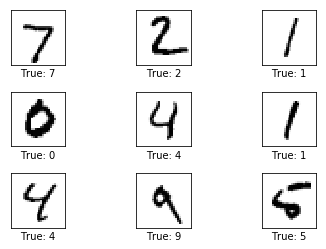

In [12]:
images = data.test.images[0:9]
cls_true = data.test.cls[0:9]
plot_images(images=images, cls_true=cls_true)

unlike numpy tensorflow sees beyond automatically uses the gradient to optimize the graph where the graph within tensorflow different parts:
<h4 id="wecreateourmodel">We create our model</h4>

+ Variable placeholder
+ model variables
+ mathematical function model
+ cost measure to optimize the variables
+ Optimization method that updates model variables


<h4 id="wecreateourmodel">We create our model</h4>

+ x will contain the input images placeholder will contain an albitrary number of images
+ and correspond to the position markers and another for the true classes being a one-dimensional vector
+ w weight tensioner
+ b bias tensor
+ longits defines the linear model

In [13]:
x = tf.placeholder(tf.float32, [None, img_size_flat])
y_true = tf.placeholder(tf.float32, [None, num_classes])
y_true_cls = tf.placeholder(tf.int64, [None])
w = tf.Variable(tf.zeros([img_size_flat, num_classes]))
b = tf.Variable(tf.zeros([ num_classes]))
logits = tf.matmul(x, w) + b

softmax is a proper function that allows you to perform the calculation for the normalization of the values so that each row of the matrix logits adds one.

In [14]:
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, dimension=1)

To minimize the cross-entropy of the function, it is optimized with the built-in function of tensorfolow, choosing a measure of how the model of each image behaves, ie the cost.

To measure the process, a boolean vector is created where the predicted class is verified if the class is true of each image.

In [15]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
session = tf.Session()
session.run(tf.global_variables_initializer())

function for the number of iterations you must perform to gradually improve weights and biases

In [16]:
batch_size = 200  

def optimize(num_iterations):
    for i in range(num_iterations):
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        session.run(optimizer, feed_dict=feed_dict_train)

we create a set of functions to help us monitor the performance of our classifier

In [17]:
# diccionario de datos
feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

In [18]:
# clasificamos el conjunto de prueba
def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)

    print("Accuracy on test-set: {0:.1%}".format(acc))

In [19]:
def print_confusion_matrix():
    # Get the true classifications for the test-set.
    cls_true = data.test.cls

    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

function to plot the weights of the model

In [20]:
def plot_weights():
    # Get the values for the weights from the TensorFlow variable.
    wi = session.run(w)
    w_min = np.min(wi)
    w_max = np.max(wi)
    fig, axes = plt.subplots(3, 4)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Only use the weights for the first 10 sub-plots.
        if i<10:
            image = wi[:, i].reshape(img_shape)
            ax.set_xlabel("Weights: {0}".format(i))
            ax.imshow(image, vmin=w_min, vmax=w_max, cmap='seismic')

        # Remove ticks from each sub-plot.
        ax.set_xticks([])
        ax.set_yticks([])

In [21]:
print_accuracy()

Accuracy on test-set: 9.8%


In [22]:
optimize(num_iterations=1)
print_accuracy()

Accuracy on test-set: 40.3%


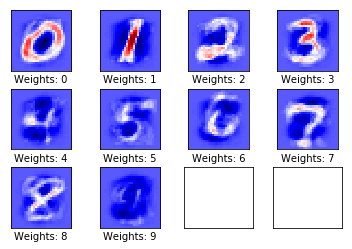

In [23]:
plot_weights()

In [24]:
# We have already performed 1 iteration.
optimize(num_iterations=9)
print_accuracy()

Accuracy on test-set: 82.0%


Accuracy on test-set: 92.1%


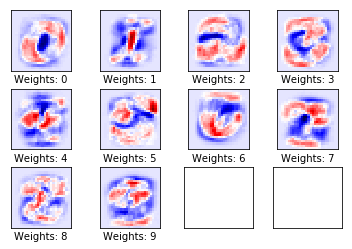

In [25]:
optimize(num_iterations=999)
print_accuracy()
plot_weights()

[[ 951    0    4    1    0    9   12    1    2    0]
 [   0 1104    4    2    0    2    4    2   17    0]
 [   4    4  937    6    9    5   15   11   37    4]
 [   3    1   30  882    0   49    3   15   22    5]
 [   1    1    8    0  915    1   13    2   12   29]
 [   8    3    6   22    7  793   17    4   27    5]
 [   7    3    5    0    9   11  919    1    3    0]
 [   1    7   32    4    6    1    0  950    2   25]
 [   5    4    9   12    8   32   12   10  877    5]
 [   9    5    3    8   43   15    0   34   10  882]]


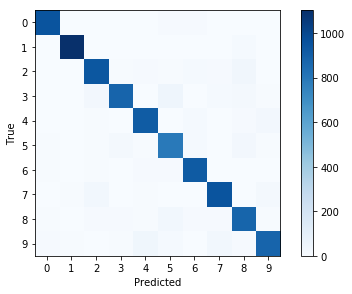

In [26]:
print_confusion_matrix()

In [27]:
# We have already performed 1 iteration.
optimize(num_iterations=9)
print_accuracy()

Accuracy on test-set: 92.1%


In [28]:

optimize(num_iterations=1)
print_accuracy()

Accuracy on test-set: 92.3%


Accuracy on test-set: 92.2%


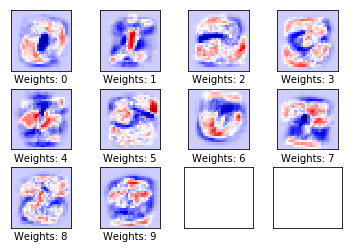

In [29]:
optimize(num_iterations=999)
print_accuracy()
plot_weights()

[[ 958    0    2    3    0    5    9    1    2    0]
 [   0 1109    2    2    0    2    4    2   14    0]
 [   6    8  914   20    7    5   11   10   40   11]
 [   2    0   13  938    0   20    2    8   18    9]
 [   1    2    4    2  909    1   11    2    8   42]
 [   9    2    2   51    7  773   11    5   25    7]
 [   9    3    4    2    9   21  904    2    4    0]
 [   1    6   20   10    7    1    0  939    5   39]
 [   3    7    7   38    8   31    9    7  856    8]
 [   9    8    1   15   27    6    1   12    8  922]]


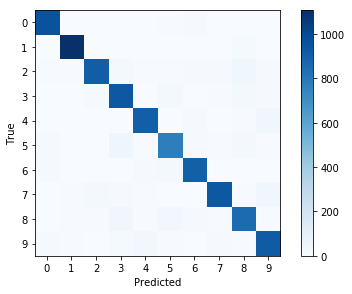

In [30]:
print_confusion_matrix()